# A8: Dimensionality Reduction With PCA
### Khushbu Singh [ID: 989465248]                                              <span style="float:right;">11/13/2024</span>

## Importing the necessary Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load MNIST Data 

In [5]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data
 
d0 = pd.read_csv('C:/Users/Khush/Python Analysis/digit-recognizer/train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

### Explanation
- I have taken the data-set from Kaggle [https://www.kaggle.com/c/digit-recognizer/data]
- I am loading the MNIST dataset from a CSV file into a DataFrame, separating the labels (target values) into a variable `l`, and storing only the pixel data in a new DataFrame `d`.
- I am printing first five rows to see how the data looks like.
- This prepares the dataset for analysis.

In [7]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


- Checking the dimensions of the data.
- `d.shape` gives the number of rows and columns in the pixel data, while `l.shape` provides the number of labels (target values) for the images.

### Displaying a Handwritten Digit Image from the MNIST Dataset

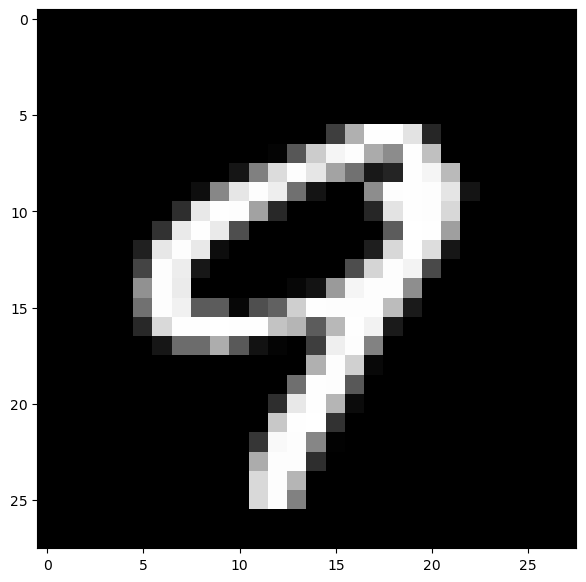

In [10]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

### Explanation
- I am selecting the image data at index 100, reshaping it into a 28x28 matrix because total Pixels are 784, and displaying it as a grayscale image. 
- Finally, printing the corresponding label to show which digit the image represents.

In [12]:
print(l[idx])

9


## 2D Visualization using PCA 

In [14]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

num_samples = 10000
labels = l.head(num_samples)
data = d.head(num_samples)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (10000, 784)


### Explanation
- First 10,000 data points from two datasets ('l' and 'd') and assigning them to 'labels' and 'data' variables respectively.
- It then prints the shape of the 'data' subset.
- This approach is used to work with a smaller, more manageable portion of the data for faster processing and initial analysis, while suggesting that the full dataset of 42,000 points could be analyzed later for a more comprehensive study.

## Standardizing the data
- Standardizing data involves scaling features to have zero mean and unit variance.
- It's needed before PCA to ensure all features contribute equally, preventing those with larger scales from dominating the analysis.
- This is typically done using StandardScaler from sklearn, applying the fit_transform() method to training data.ransform

In [17]:
# Data-preprocessing: Standardizing the data
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(10000, 784)


### Explanation
- This code uses StandardScaler from sklearn to standardize the 'data' by centering it around zero mean with unit variance.
- The fit_transform() method is applied to scale the data, and the shape of the resulting standardized dataset is printed.
- Printing to see the size of data is still same as it should not change after applying StandardScalar.

## Calculating the Covariance 

- Covariance measures how two variables change together, indicating whether they move in the same or opposite directions.
- It's needed to understand the relationship between variables in statistical analysis, particularly for assessing linear dependencies and as a step in calculating correlation. and why ?

In [21]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


### Explanation
- This calculates the covariance matrix by multiplying the transposed standardized data (sample_data.T) with the original data using numpy's matmul function.
- The resulting covariance matrix is stored in covar_matrix, and its shape is printed to show the dimensions of the matrix.
- 784*784 shape reflects performing calculations over 784 features, resulting in a matrix where each row and each column represents the covariance between pairs of these features.

## Calulating the eigen vector and corresponding eigen values

- Eigenvalues are scalars that scale eigenvectors, which are special vectors that maintain their direction when a linear transformation is applied.
- They are important because they reveal fundamental properties of linear transformations, simplify complex calculations, and have wide-ranging applications in fields like physics, engineering, and data science.
  culate them?
why eigh fucntion is used ?
explain the print code what and why ?

In [24]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space

from scipy.linalg import eigh 

# Calculate all eigenvalues and eigenvectors
values, vectors = eigh(covar_matrix)

print("Shape of eigen vectors = ",vectors.shape)
print("Shape of eigen values = ",values.shape)

Shape of eigen vectors =  (784, 784)
Shape of eigen values =  (784,)


### Explanation
- scipy.linalg.eigh  function to calculate eigenvalues and eigenvectors of the covariance matrix.
- This function returns two arrays: 'values' containing eigenvalues in ascending order, and 'vectors' containing the corresponding eigenvectors as columns, with the shape of the eigenvectors matrix being printed.
- I see 784 eigen values for each of the 784 pixels.
- size of eigen vector is 784x784 same as size of covariance matrix.

## Sorting the eigen vector according to eigen values

Sorting eigenvalues and eigenvectors in descending order prioritizes the most important components that explain the most variance in the data, which is crucial for effective dimensionality reduction and feature selection in techniques like Principal Component Analysis (PCA).

In [27]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(values)[::-1]  # Sort indices in descending order
sorted_values = values[sorted_indices]     # Sort eigenvalues
sorted_vectors = vectors[:, sorted_indices]  # Sort eigenvectors according to sorted eigenvalues

# Now, sorted_values contains the eigenvalues in descending order
# and sorted_vectors contains the eigenvectors in corresponding order

- This code sorts eigenvalues in descending order and rearranges the corresponding eigenvectors accordingly.
- np.argsort is used to get the indices that would sort the array, and [::-1] reverses these indices to achieve descending order, allowing for efficient sorting of both eigenvalues and eigenvectors simultaneously.

## Plot Covered variance with Number of Eigen Vectors
- This plot visualizes the cumulative explained variance as more eigenvectors (principal components) are added, helping to determine the optimal number of components (K) for dimensionality reduction in PCA.
- It allows for balancing between data compression and information retention by identifying the point where additional components provide diminishing returns in explaining data variance.

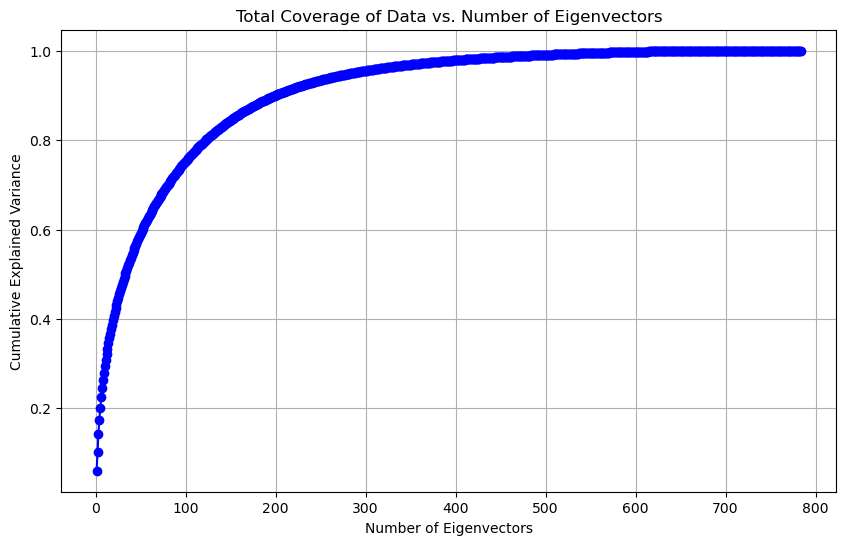

In [30]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(sorted_values) / np.sum(sorted_values)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Cumulative Explained Variance")
plt.title("Total Coverage of Data vs. Number of Eigenvectors")
plt.grid(True)
plt.show()


### Explanation
- This graph shows the cumulative explained variance as more eigenvectors (principal components) are added. The x-axis represents the number of eigenvectors, while the y-axis shows the proportion of total variance explained. The curve typically rises sharply at first, then levels off as additional components contribute less to the overall variance explanation.
- I choose k=500, because by looking for the point where the curve starts to flatten significantly, indicating diminishing returns from adding more components. At this point, you've captured a substantial amount of the data's variance while significantly reducing dimensionality. The exact choice of k=500 would be based on balancing variance retention with computational efficiency and the specific needs of your analysis.s.

## Choosing the first k eigen vectors and eigenvalues

In [33]:
# Choose top K eigenvalues
K = 500
top_k_variance = np.sum(sorted_values[:K])
total_variance = np.sum(sorted_values)

# Calculate the percentage of variance explained by the top K eigenvectors
explained_variance_ratio = top_k_variance / total_variance * 100

print(f"Using the top {K} eigenvectors, {explained_variance_ratio:.2f}% of the variance is accounted for.")


Using the top 500 eigenvectors, 99.08% of the variance is accounted for.


### Explanation:
- Eigenvalues represent the variance explained by each corresponding eigenvector.
- By sorting eigenvalues in descending order, we prioritize eigenvectors that account for the most variance.
- Summing the top 500 eigenvalues (top_k_variance) gives the total variance explained by the first 500 eigenvectors.
- Dividing top_k_variance by total_variance and multiplying by 100 gives the percentage of variance explained by the top 500 eigenvectors.
  
This percentage indicates how much of the dataset's variability can be captured by using only the first 500 eigenvectors. If the result is, say, 95%, it implies that these 500 eigenvectors are sufficient to explain 95% of the data’s variance, meaning the remaining eigenvectors contribute minimally to the overall data variability.

## Transform the original data into K dimensions

In [36]:
# Select the top K eigenvectors
K = 500
top_k_vectors = sorted_vectors[:, :K]  # Shape: (n, K)

# Transform the original data into K dimensions
data_transformed = np.dot(data, top_k_vectors)

print(f"The transformed data shape is: {data_transformed.shape}")


The transformed data shape is: (10000, 500)


### Explanation
- sorted_vectors[:, :K] selects the first 500 columns, which are the top 500 eigenvectors corresponding to the highest eigenvalues.
- np.dot(data, top_k_vectors) projects the original n-dimensional data into the new k-dimensional space. The resulting data_transformed has a shape of (num_samples, K).
This k-dimensional representation retains the most significant variance from the original data, as it captures the directions (principal components) where the data varies the most.

## Plotting Principle Components

- Projecting data into 2 dimensions, even if it covers less variance than using K= 500, allows for easy visualization and interpretation of the data's main trends.
- This 2D representation can reveal important patterns, clusters, or relationships that might be difficult to discern in higher dimensions, making it a valuable tool for exploratory data analysis and communication of results.

In [40]:
top_2_vectors = sorted_vectors[:, :2]
data_2d = np.dot(data, top_2_vectors)
df_data_2d = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
df_data_2d['Labels'] = labels
df_data_2d.head()

,PC1,PC2,Labels
0,143.292768,-534.901093,1
1,2298.108147,443.989400,0
2,-97.421011,-263.973399,1
3,526.446141,308.292433,4
4,2720.830298,436.807808,0


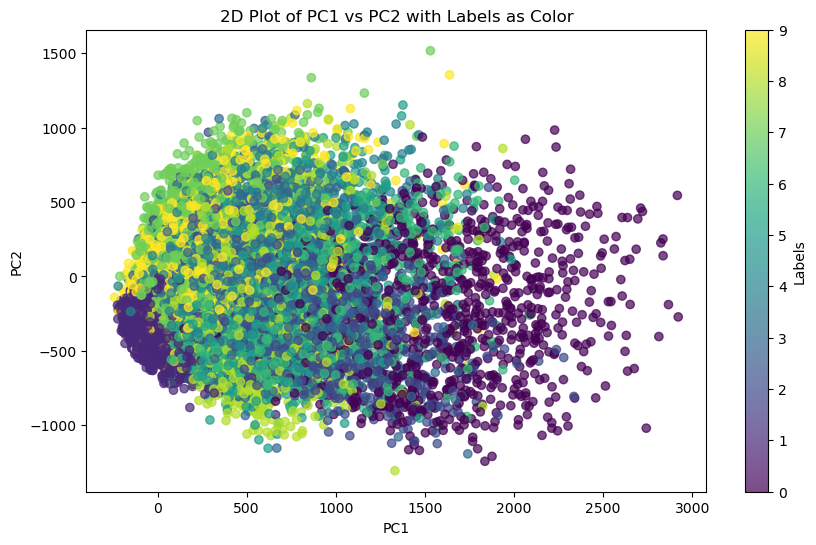

In [41]:
# Plotting the 2D scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_data_2d['PC1'], df_data_2d['PC2'], c=df_data_2d['Labels'], cmap='viridis', alpha=0.7)

# Adding labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Plot of PC1 vs PC2 with Labels as Color')

# Add color bar for labels
plt.colorbar(scatter, label='Labels')

plt.show()

### Explanation
The code and plot can be explained in the following key points:

1. **2D Scatter Plot**: The scatter plot visualizes the data projected onto the first two principal components (PC1 and PC2), where each point represents a data sample in this reduced 2D space.

2. **Color Mapping by Labels**: The points are color-coded based on their corresponding labels using the 'viridis' colormap, which helps in visually distinguishing different classes or clusters in the data.

3. **Plot Customization**: Axis labels ('PC1' and 'PC2') and a title ("2D Plot of PC1 vs PC2 with Labels as Color") are added to provide context to the plot, making it easier to interpret.

4. **Color Bar for Labels**: A color bar is included on the right side of the plot, which provides a reference for the label values associated with each color, enhancing the interpretability of the data distribution across different cateC0EEA6D.jpg

### Interpretation
1. **Cluster Distribution**: The 2D scatter plot shows a mix of overlapping clusters with no clear separation between different label categories, indicating that while PCA reduced the data to two dimensions, it may not fully capture the variance needed to distinctly separate the labels.

2. **Variance Coverage**: The color gradient (from purple to yellow) represents different label values, showing that the data points are spread across the 2D space, but significant overlap suggests that more principal components may be required to achieve better class separatioD.jpg